In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import data

In [18]:
data = pd.read_excel(r'C:\Users\Admin\Downloads\titanic3.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [19]:
data.columns 

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In our dataset, there are several entries that are not pertinent to our analysis. To maintain clarity and focus on our primary objectives, we will proceed to drop these extraneous entries.

In [20]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis =1)


In [21]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [22]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


# Observation from the Data:

In the count column, both the pclass and survived attributes have a total of 1309 entries, indicating they are fully populated.
However, the age attribute only has 1046 entries. This suggests there are missing values in our dataset for the age of some passengers.


# Handling Missing Data:

Given the presence of missing data in the age attribute, we had two potential courses of action:

Fill the Missing Values: Fill the missing entries for age with the mean value of the existing age data.
Drop the Missing Values: Remove rows that have missing age values from our dataset.

Decision:

We've chosen to drop the missing data. Given that we have a substantial amount of data, removing the rows with missing age values is unlikely to adversely impact the performance of our algorithms.

In [23]:
data = data.dropna(axis=0)
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [24]:
data.shape

(1046, 4)

After cleaning, pclass, survived, and age all have matching entry counts, confirming missing data was addressed.

Distribution of Passengers by Class 

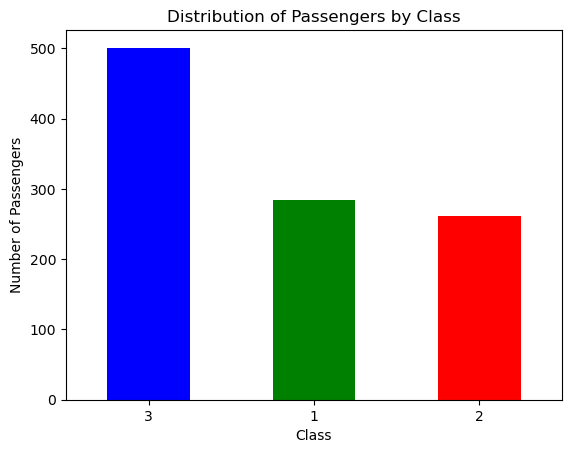

In [25]:
class_counts = data['pclass'].value_counts()

class_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()

Age Distribution of Passengers

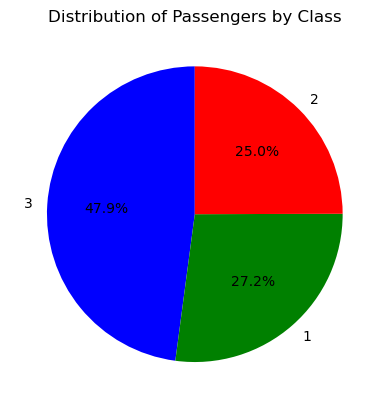

In [26]:
class_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'red'])
plt.title('Distribution of Passengers by Class')
plt.ylabel('')  # This hides the default 'pclass' ylabel
plt.show()

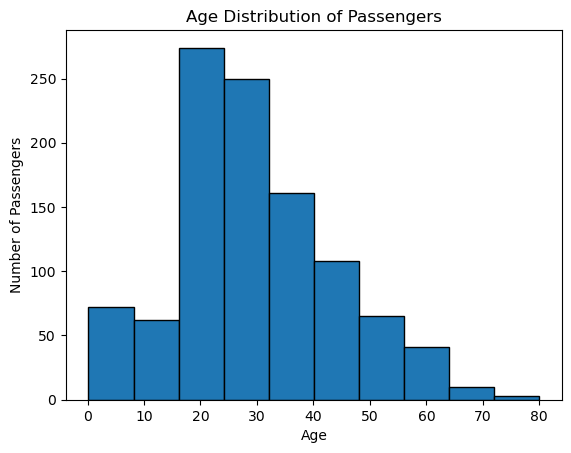

In [27]:
data['age'].plot(kind='hist', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

Descriptive Statistics: Passenger Sex
To check if there is an equal distribution of males and females on the Titanic.

In [31]:
data.groupby('sex')['survived'].mean()

sex
female    0.752577
male      0.205167
Name: survived, dtype: float64

<Axes: xlabel='sex', ylabel='survived'>

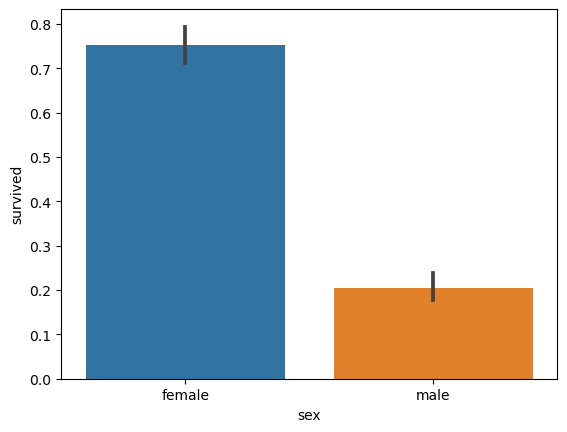

In [32]:
sns.barplot(x='sex', y='survived', data=data)

From our analysis, it's evident that:

- Over 75% of the female passengers survived.
- In contrast, only about 20% of the male passengers survived.

Descriptive Statistics: Passenger Class

To observe the distribution of passengers across different classes.

In [33]:
data.groupby('pclass')['survived'].mean()


pclass
1    0.637324
2    0.440613
3    0.261477
Name: survived, dtype: float64

<Axes: xlabel='pclass', ylabel='survived'>

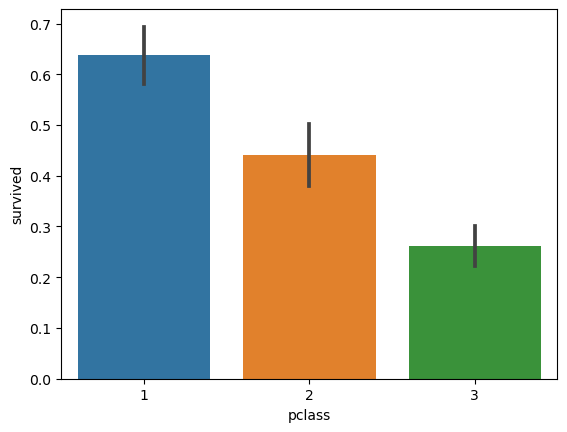

In [34]:
sns.barplot(x='pclass', y='survived', data=data)


From the data, we observe the following survival rates for each class:

- First Class (Pclass 1): Approximately 63.7% of the passengers survived.
- Second Class (Pclass 2): About 44.1% of the passengers survived.
- Third Class (Pclass 3): Only 26.1% of the passengers managed to survive.
This trend suggests a clear disparity in survival rates based on the class in which passengers traveled. Passengers in the first class had a significantly higher chance of surviving compared to those in the third class.

In [37]:
data.groupby(['sex', 'pclass'])['survived'].mean()


sex     pclass
female  1         0.962406
        2         0.893204
        3         0.473684
male    1         0.350993
        2         0.145570
        3         0.169054
Name: survived, dtype: float64

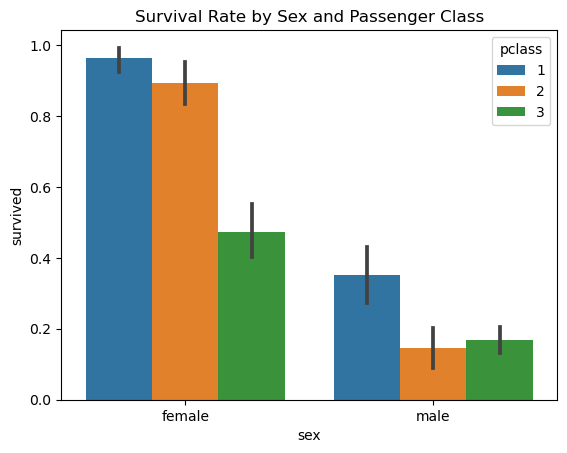

In [38]:
sns.barplot(x='sex', y='survived', hue='pclass', data=data)
plt.title('Survival Rate by Sex and Passenger Class')
plt.show()

When breaking down survival rates by both sex and pclass, we observe some distinct patterns:

- Women in the First Class: An overwhelming 96.2% managed to survive, showcasing the highest survival rate across all categories.

- For women, as we move down the classes, the survival rate drops noticeably. From 96.2% in the first class, it dips to 89.3% in the second, and further down to 47.4% in the third class.

- Men in the First Class: They had a survival rate of 35.1%, which, while being significantly lower than their female counterparts in the same class, still represents a much higher chance compared to men in lower classes.

- Interestingly, men in the Third Class exhibited a slightly higher survival rate of 16.9% compared to men in the Second Class, who had a rate of 14.6%. This is counterintuitive as one might expect survival rates to uniformly decrease with class ranking, but this showcases the complexity and multifaceted nature of the data.